# Devoir de Mécanique Quantique, Q2.
## Stokes Flow, Biharmonique.
Dimitrov Subin et Vilarino Marine

In [1]:
import numpy
%matplotlib inline
import matplotlib.pyplot as pyplot
%matplotlib inline
from matplotlib import rcParams, cm

### Objectif

L'objet de ce travail est de résoudre un problème nommé "lid driven cavity flow".
Il s'agit de résoudre l'équation biharmonique $\nabla^4 \psi= 0$ ( $\psi$ étant le champ d'écoulement) sur le domaine $\Omega$ d'une cavité carré en considérant les conditions de bords de Neumann et Dirichlet afin d'obtenir le champ d'écoulement dans la cavité à l'état stable.

### Méthode

Pour ce faire, nous allons discrétiser le champ d'écoulement sur le domaine. 

On muni le domaine $\Omega$ d'un système d'axes orthogonal à 2D afin de paramétriser le champ d'écoulement.

On pose: 

Origine au coin en haut à gauche de la cavité. 

Axe horizontal $\equiv$ 0x

Axe vertical $\equiv$ 0y

Longueur de chaque coté de la cavité : L=1

On discrétise chacun des cotés de la cavité en 41 points distanciés équitablement. Longueur entre chaque point: $\Delta= \frac{1}{40}$. 

On associe à chacun des 41x41 points du domaine une valeur de $\psi$. $\psi$ est ainsi discrétisé.

On commence par poser une valeur estimée de $\psi$. 
On utilise une méthode de relaxation qui commence par une hypothèse initiale pour $\psi$, (que nous notterons $\psi_{y,x}^{0}$ ) puis qui itère vers la solution. Nous utiliserons l'expression de notre biharmonique sous forme discrétisée (voir plus bas) pour obtenir une mise à jour, $\psi_{y,x}^{1}$, puis continuerons à calculer $\psi_{y,x}^{k}$ (k correspond au nombre d'itérations que nous effectuons dans le schéma de relaxation) jusqu'à ce que nous ayons sa valeur à l'état stable.

En réalité le système n'atteindra l'équilibre que lorsque le nombre d'itérations tendra vers ∞, mais nous allons approximer l'état d'équilibre en itérant jusqu'à ce que le changement entre une itération et la suivante soit très faible. Nous choisirons ici la valeur $\begin{equation}
|\textbf{x}| = \sqrt{\sum_{y=0, x=0}^{40} \left|\psi^{k+1}_{y,x} - \psi^k_{y,x}\right|^2}
\end{equation}  =  10^{-8}$, valeur à partir de laquelle nous considérerons notre état a l'équilibre.

Ainsi nous utiliserons une boucle while qui continue à appliquer itérativement le schéma de relaxation jusqu'à ce que la différence entre deux itérations successives soit celle souhaitée.

Le schéma de relaxation que nous emploierons est celui du Gradient Conjugué.

### Biharmonique 

Discrétisation de l'équation biharmonique $\nabla^4 \psi= 0$ avec l'expression des différences finies. 



À deux dimensions, $\nabla^4 = \nabla^2\nabla^2 = \left(\frac{\partial ^2}{\partial x^2} + \frac{\partial ^2}{\partial y^2}\right)\left(\frac{\partial ^2}{\partial x^2} + \frac{\partial ^2}{\partial y^2}\right) =      \frac{\partial ^4}{\partial x^4} + 2\frac{\partial ^4}{\partial x^2 \partial y^2} + \frac{\partial ^4}{\partial y^4}$


En différence centrale finie du second ordre: 

$\frac{\partial ^2 f}{\partial r^2}=\frac{f_{r-1}-2f_{r}+f_{r+1}}{\Delta r^2} + {\mathcal O}(\Delta r^2)$

$\frac{\partial ^4 f}{\partial r^4}=\frac{f_{r-2} -4f_{r-1} +6f_{r} -4f_{r+1} + f_{r+2}}{\Delta r^4} + {\mathcal O}(\Delta r^4)$

En combinant ces deux dernières équations dans la première et puisque $\Delta x=\frac{1}{40}=\Delta y \equiv \Delta$, nous trouvons :

$$\nabla^4 \psi   = \frac{20\psi_{y,x} - 8 \left( \psi_{y,x-1} + \psi_{y,x+1} + \psi_{y-1,x} + \psi_{y+1,x} \right) + 2 \left( \psi_{y-1,x-1} + \psi_{y-1,x+1} + \psi_{y+1,x-1}+ \psi_{y+1,x+1}  \right) + \left(  \psi_{y,x-2} + \psi_{y,x+2} + \psi_{y-2,x}+\psi_{y+2,x}\right)}{\Delta^4} = 0 $$

### Condition aux bords

#### Conditions de Dirichlet
Ce sont les conditions de la solution aux limites spécifiant la valeur de la solution au bord. 

Nous avons: $\psi = 0 $ en $\partial\Omega$.
Ce qui, lorsque $\psi$ est discrétisé, donne:

Left: $\psi_{y,0} = 0 $

Right : $\psi_{y,40} = 0 $

Top : $\psi_{0,x} = 0 $

Bottom: $\psi_{40,x} = 0 $


#### Conditions de Neumann

Ce sont les conditions spécifiant la dérivée normale de la solution sur la limite.

Nous avons:$\frac{\partial \psi}{\partial n} = \left\{\begin{align*}
 & 0 \text{ en } x=0,y=0 \text{ et } y=1 & \\ 
 & 1 \text{ en } x=1 & 
\end{align*}\right.$ en posant notre origine au point en haut à gauche de la cavité.

Afin d'implémenter ces conditions, nous les avons exprimées sous leur forme discrétisée au second ordre en différence finie forward et backward dont les expréssions générales sont:

Forward: $\frac{\partial f}{\partial n} =\frac{-\frac{3}{2}f_{0}+2f_{1}-\frac{1}{2}f_{2}}{\Delta n}$

Backward: $\frac{\partial f}{\partial n} =\frac{\frac{1}{2}f_{38}-2f_{39}+\frac{3}{2}f_{40}}{\Delta n}$

Nous avons donc:

Left (Forward) :  $\frac{\partial \psi}{\partial x} =\frac{-\frac{3}{2}\psi_{y,0}+2\psi_{y,1}-\frac{1}{2}\psi_{y,2}}{\Delta }=0$           $\Rightarrow \psi_{y,1}=\frac{\psi_{y,2}}{4}$

Right (Backward):  $\frac{\partial \psi}{\partial x} =\frac{\frac{1}{2}\psi_{y,38}-2\psi_{y,39}+\frac{3}{2}\psi_{y,40}}{\Delta}=0 \Rightarrow \psi_{y,39}=\frac{\psi_{y,38}}{4}$

Top (Forward) : $\frac{\partial \psi}{\partial y} =\frac{-\frac{3}{2}\psi_{0,x}+2\psi_{1,x}-\frac{1}{2}\psi_{2,x}}{\Delta }=0 \Rightarrow \psi_{1,x}=\frac{\psi_{2,x}}{4}$

Bottom (Backward):  $\frac{\partial \psi}{\partial y} =\frac{\frac{1}{2}\psi_{38,x}-2\psi_{39,x}+\frac{3}{2}\psi_{40,x}}{\Delta}=1 \Rightarrow \psi_{39,x}=\frac{\psi_{38,x}}{4}-\frac{\Delta}{2}$

In [2]:
nx = 41  # number of points in the x direction
ny = 41  # number of points in the y direction
xmin, xmax = 0.0, 1.0  # limits in the x direction
ymin, ymax = 0.0, 1.0  # limits in the y direction
Lx = xmax - xmin  # domain length in the x direction
Ly = ymax - ymin  # domain length in the y direction
dx = Lx / (nx - 1)  # grid spacing in the x direction
dy = Ly / (ny - 1)  # grid spacing in the y direction

# Create the gridline locations.
x = numpy.linspace(xmin, xmax, num=nx)
y = numpy.linspace(ymin, ymax, num=ny)

# Measure the difference between the newly calculated flow and the old one.
def l2_norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

# Set the initial guess flow.
a0 = numpy.zeros((ny, nx)) 

# Set the boundary conditions.
a0[1:-1,1]=0.25*a0[1:-1,2] # Left
a0[1:-1,-2]=0.25*a0[1:-1,-3] # Right
a0[1,1:-1]=0.25*a0[2,1:-1] # Top
a0[-2,1:-1]=-0.5*dx + 0.25*a0[-3,1:-1] # Bottom



### Méthodes des gradiants conjugué.

Nous commençons par écrire notre système comme $A{\bf p}={\bf b}$ (convention: $\bf p \equiv \psi$), où $A$ est un opérateur détérminé en utilisant les coefficients des $\psi_{y,x}$ intervenant dans les équations discrétisées de $\psi$ (c'est-à-dire la biharmonique et les dérivées normales aux bords). $\bf b$ est le terme de source, obtenu en isolant les termes scalaires dans lesdites équations. 

Nous définissons les résidus comme étant la différence entre la solution que nous avons à l'étape n°k et le terme de source
$ {\bf r^k} = \bf b - A \bf p^k $ .

La méthode de la descente la plus pentue nous a appris à utiliser le coefficient alpha $\alpha = \frac{{\bf r}^k \cdot {\bf r}^k}{A{\bf d}^k \cdot {\bf d}^k}$ qui sert à proportionner le changement que nous appliquons à notre solution d'ordre k+1 par rapport à la solution d'ordre k. 

Nous définissons le vecteur de direction par ${\bf d}^{k+1}={\bf r}^{k+1}+\beta{\bf d}^{k} $ et le coefficient beta, $ \beta = \frac{{\bf r}^{k+1} \cdot {\bf r}^{k+1}}{{\bf r}^k \cdot {\bf r}^k}$.

Pour commencer, nous fixons notre résidu initial comme étant ${\bf b}-A{\bf p}^0={\bf r}^0\ne {\bf 0}$. Il est à noter que $A{\bf p}^0 = 0$.
Nous fixons  ${\bf d}^0 = {\bf r}^0$.

Et ensuite :

1.  $\alpha = \frac{{\bf r}^k \cdot {\bf r}^k}{A{\bf d}^k \cdot {\bf d}^k}$
2.  ${\bf p}^{k+1}={\bf p}^k + \alpha {\bf d}^k$
3.  ${\bf r}^{k+1} = {\bf r}^k - \alpha A {\bf d}^k$ $\ \ \ \ $
4.  $\beta = \frac{{\bf r}^{k+1} \cdot {\bf r}^{k+1}}{{\bf r}^k \cdot {\bf r}^k}$
5.  ${\bf d}^{k+1}={\bf r}^{k+1}+\beta{\bf d}^{k}$
6. réitération

In [3]:
# Apply the Laplacian operator and the boundary conditions to d.
def A(d):
    Ad = numpy.zeros_like(d)
    dd=d.copy()
    d[1:-1,1]=0.25*dd[1:-1,2] # Left
    d[1:-1,-2]=0.25*dd[1:-1,-3] # Right
    d[1,1:-1]=0.25*dd[2,1:-1] # Top
    d[-2,1:-1]= 0.25*dd[-3,1:-1] # Bottom
       
    Ad[2:-2,2:-2]= (20*d[2:-2,2:-2] - 8*d[3:-1,2:-2] - 8*d[2:-2,3:-1] - 8*d[1:-3,2:-2]\
            - 8*d[2:-2,1:-3] + 2*d[3:-1,1:-3] + 2*d[3:-1,3:-1] + 2*d[1:-3,1:-3]\
            + 2*d[1:-3,3:-1] + d[4:,2:-2] + d[:-4,2:-2] + d[2:-2,4:] + d[2:-2,:-4]) 
    return Ad
            

In [4]:
# Create the source term.
b0 = numpy.zeros((ny,nx))
b0[-3,2:-2]=-(dx*2)
b0[-4,2:-2]=(dx/2)

In [5]:
# Compute the solution using the method of conjugate gradient.
def poisson_2d_conjugate_gradient(a, b, dx, dy, rtol):
    """
    Solves the 2D Poisson equation on a uniform grid,
    with the same grid spacing in both directions,
    for a given forcing term
    using the method of steepest descent.
    
    The function assumes Dirichlet boundary conditions with value zero
    and Neumann boundary conditions with value zero everywhere unless 
    on the low edges where the value is one.
    
    The exit criterion of the solver is based on the relative L2-norm
    of the solution difference between two consecutive iterations.

    Parameters
    ----------
    a : numpy.ndarray
        The initial solution as a 2D array of floats.
    b : numpy.ndarray
        The forcing term as a 2D array of floats.
    dx : float
        Grid spacing in the x direction.
    dy : float
        Grid spacing in the y direction.
    rtol : float, optional
        Relative tolerance for convergence;
        default: 1e-6.

    Returns
    -------
    p : numpy.ndarray
        The solution after relaxation as a 2D array of floats.
    """

    r = numpy.zeros_like(a)  # initial residual
    Ad = numpy.zeros_like(a)  # to store the mat-vec multiplication
    
    diff = rtol + 1  # initial difference

    # Compute the initial residual.
    r=b
    # Set the initial search direction to be the residual.
    d = r.copy()
    while diff > rtol:
        ak = a.copy()
        rk = r.copy()
        # Compute the Laplacian of the search direction.
        Ad = A(d)
        # Compute the step size.
        alpha = numpy.sum(r * r) / numpy.sum(d * Ad)
        # Update the solution.
        a = ak + alpha * d
        a[:,0]=0
        a[:,-1]=0
        a[0,:]=0
        a[-1,:]=0

        #Conditions de Neumann
        a[-2,1:-1]=-0.5*dx + 0.25*a[-3,1:-1]
        a[1,1:-1]=0.25*a[2,1:-1]
        a[1:-1,1]=0.25*a[1:-1,2]
        a[1:-1,-2]=0.25*a[1:-1,-3]
        # Update the residual.
        r = rk - alpha * Ad
        # Update the search direction.
        beta = numpy.sum(r * r) / numpy.sum(rk * rk)
        d = r + beta * d
        # Dirichlet boundary conditions are automatically enforced.
        # Compute the relative L2-norm of the difference.
        diff = l2_norm(a, ak)
        

    return a

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

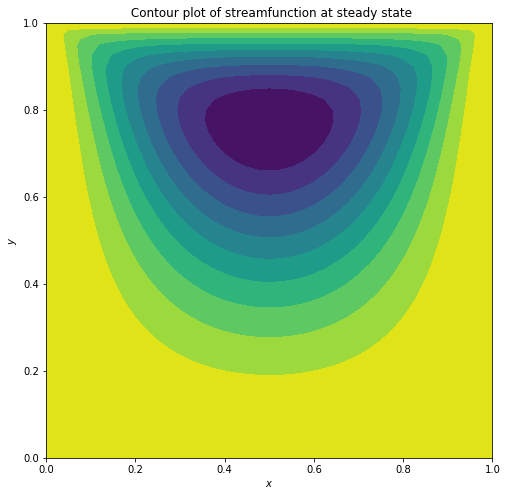

In [6]:
# a value in stady state.
a=poisson_2d_conjugate_gradient(a0, b0, dx, dy,1e-6)

# Plot the contour plot of streamfunction at steady state.
fig=pyplot.figure(figsize=(8,8))
pyplot.contourf(x,y,a,11, cmap=cm.viridis)
pyplot.title(' Contour plot of streamfunction at steady state')  # set the title
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar

In [7]:
print('Valeur en x=0.6 et y=0.2: {}'.format(a[8,24]))
print('Valeur en x=0.6 et y=0.4: {}'.format(a[16,24]))
print('Valeur en x=0.6 et y=0.6: {}'.format(a[24,24]))
print('Valeur en x=0.6 et y=0.8: {}'.format(a[32,24]))

Valeur en x=0.6 et y=0.2: -0.010031150164403818
Valeur en x=0.6 et y=0.4: -0.03613391670775477
Valeur en x=0.6 et y=0.6: -0.07376729712960138
Valeur en x=0.6 et y=0.8: -0.09444454556079468


## Conclusion

Nous obtenons comme valeurs pour $\psi$ 

\begin{array}{|c|c|c|}
\hline x & y & \psi \\\hline
  0.6 & 0.2 & -0.010031150164403818 \\\hline
  0.6 & 0.4 & -0.03613391670775477 \\\hline
  0.6 & 0.6 & -0.07376729712960138 \\\hline
  0.6 & 0.8 & -0.09444454556079468 \\\hline
\end{array}



In [8]:
5+3

8